# Example notebok for dummy diagnostic

Each diagnostic should have a notebook that demonstrates how to use it. 
This notebook should be placed in this folder. 
The notebook should be named after the diagnostic itself or a particular functionality, with the extension .ipynb.

In [1]:
import os

# Specify the path to your desired working directory
working_directory = '/work/ab0995/a270223/AQUA/diagnostics/SSH/'

# Change the working directory
os.chdir(working_directory)

In [2]:
import sys
# temporary hack if your env-dummy.yml
# does not install your diagnostic.
sys.path.insert(0, '../')
from ssh_class import sshVariability

In [3]:
! hostname
! pwd

l20395.lvt.dkrz.de
/work/ab0995/a270223/AQUA/diagnostics/SSH


In [4]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:          251Gi       8.0Gi       240Gi        95Mi       2.7Gi       240Gi
Swap:            0B          0B          0B


CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 14.3 µs
Dask Dashboard URL: http://127.0.0.1:8787/status
Workers=16, Memory=235.37 GiB
AVISO data spans from  1993-01-01T00:00:00.000000000 to  2022-06-23T00:00:00.000000000
Now computing std on AVISO ssh for the provided timespan
computation for AVISO ssh complete, saving output file


/home/a/a270223/.conda/envs/aqua/lib/python3.10/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


Now loading data for other models to compare against AVISO ssh variability
initializing AQUA reader to read the model inputs for {'name': 'FESOM', 'experiment': 'tco2559-ng5', 'source': 'original_2d', 'regrid': 'r005', 'timespan': ['2020-01-20', '2020-12-31']}
Getting SSH data complete for FESOM, now computing standard deviation on the default timestamp
computation complete, saving output file
output saved, now regridding using the aqua regridder
visualizing the data in subplots
Saving plots as JPEG output file


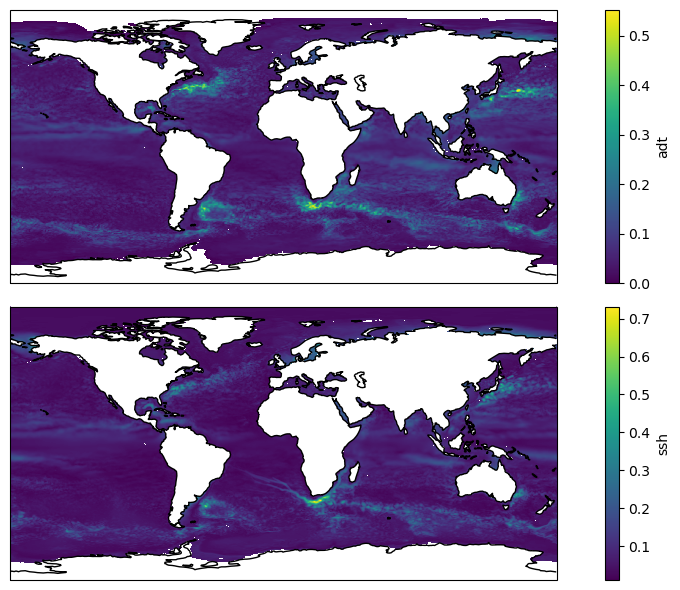

In [2]:
# Empty class to be filled with your diagnostic
# It prints the catalogue as example of what you can do
# with the aqua module
import time
%time

analyzer = sshVariability('../config.yml')
analyzer.run()

Checking the output files, if they have the data that is required.

In [4]:
import xarray as xr

# Specify the path to the NetCDF file
file_path = '../output/AVISO_std_dev.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)
data


<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    adt        (latitude, longitude) float64 ...

In [5]:
# Specify the path to the NetCDF file
file_path = '../output/FESOM_std_dev.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)
data

<xarray.Dataset>
Dimensions:  (nod2: 7402886)
Dimensions without coordinates: nod2
Data variables:
    ssh      (nod2) float32 ...